In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Specify the path to your folder
folder_path = '/content/drive/MyDrive'

# Change the current working directory to the specified folder
os.chdir(folder_path)

import pandas as pd

# Specify the name of your CSV file
csv_file_name = 'data eph without 4.csv'

# Read the CSV file
df1 = pd.read_csv(csv_file_name)

# Display the first few rows of the DataFrame
df1.head()


Mounted at /content/drive


,Year,Customer,Style,Product Hierarchy,Sales Value,SMV,RMC,Qty,EPH
0,2021,Speedo Intl.,8-12852G678,TWO-GARMENT STYLE,419.71,9.263,1228.652211,47.0,-111.485716
1,2022,Madewell,171498,NaN,0.07,14.098,152.392630,7.0,-92.612182
2,2019,Yamamay,NaN,NaN,3244.50,3.905,9689.575437,1030.0,-74.632852
3,2022,ARITZIA SWIM,STNE 03-24-35038,NaN,0.04,4.469,21.068758,4.0,-70.582094
4,2022,ARITZIA SWIM,STNE 03-24-35038,NaN,0.01,4.469,5.261290,1.0,-70.502881


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22197 entries, 0 to 22196
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               22197 non-null  int64  
 1   Customer           21857 non-null  object 
 2   Style              16530 non-null  object 
 3   Product Hierarchy  18256 non-null  object 
 4   Sales Value        22196 non-null  float64
 5   SMV                21399 non-null  float64
 6   RMC                21438 non-null  float64
 7   Qty                22195 non-null  float64
 8   EPH                21987 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.5+ MB


In [ ]:
# Assuming you want to set a default month and day, let's use January 1st
#df1['Year'] = pd.to_datetime(df1['Year'].astype(str) + '-01-01')

In [ ]:
# Convert the 'date' column to a custom format
#df1['Year'] = df1['Year'].dt.strftime('%Y')

In [ ]:
df1.head()

,Year,Customer,Style,Product Hierarchy,Sales Value,SMV,RMC,Qty,EPH
0,2021,Speedo Intl.,8-12852G678,TWO-GARMENT STYLE,419.71,9.263,1228.652211,47.0,-111.485716
1,2022,Madewell,171498,NaN,0.07,14.098,152.392630,7.0,-92.612182
2,2019,Yamamay,NaN,NaN,3244.50,3.905,9689.575437,1030.0,-74.632852
3,2022,ARITZIA SWIM,STNE 03-24-35038,NaN,0.04,4.469,21.068758,4.0,-70.582094
4,2022,ARITZIA SWIM,STNE 03-24-35038,NaN,0.01,4.469,5.261290,1.0,-70.502881


In [ ]:
df=df1[['Year','Customer','Style','Product Hierarchy',"Sales Value", "Qty",'SMV', 'RMC','EPH']]

In [ ]:
df1.count()

Year                 22197
Customer             21857
Style                16530
Product Hierarchy    18256
Sales Value          22196
SMV                  21399
RMC                  21438
Qty                  22195
EPH                  21987
dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame
null_values = df1.isnull().sum()

# Display null values count for each column
print(null_values)


Year                    0
Customer              340
Style                5667
Product Hierarchy    3941
Sales Value             1
SMV                   798
RMC                   759
Qty                     2
EPH                   210
dtype: int64


In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Assuming 'df' is your DataFrame
# Fill null values in 'Product Hierarchy' column based on 'Style' values
df['Product Hierarchy'] = df.groupby('Style')['Product Hierarchy'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else pd.NaT))


In [ ]:
# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

# Display null values count for each column
print(null_values)

Year                 0
Customer             0
Style                0
Product Hierarchy    0
Sales Value          0
Qty                  0
SMV                  0
RMC                  0
EPH                  0
dtype: int64


In [ ]:
df.count()

Year                 15622
Customer             15622
Style                15622
Product Hierarchy    15622
Sales Value          15622
Qty                  15622
SMV                  15622
RMC                  15622
EPH                  15622
dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is in a DataFrame called 'df'
X = df[['Style', 'SMV', 'Customer']]
y = df['Product Hierarchy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = ['Style', 'Customer']

# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['SMV']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.96576


In [ ]:
# Assuming your trained model is named 'model'

# New data to make predictions
new_data = pd.DataFrame({'Style': ['   4004-20'], 'SMV': [5.724], 'Customer': ['Aerie Unsubscribed']})

# Make predictions
new_predictions = model.predict(new_data)

# Print the predictions
print("Predicted Product Hierarchy:", new_predictions)


Predicted Product Hierarchy: ['SWIM BOTTOM']


In [ ]:
df=df1[['Year','Customer','Style','Product Hierarchy',"Sales Value", "Qty",'SMV', 'RMC','EPH']]

In [ ]:
df.count()

Year                 22197
Customer             21857
Style                16530
Product Hierarchy    18256
Sales Value          22196
Qty                  22195
SMV                  21399
RMC                  21438
EPH                  21987
dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

# Display null values count for each column
print(null_values)

Year                    0
Customer              340
Style                5667
Product Hierarchy    3941
Sales Value             1
Qty                     2
SMV                   798
RMC                   759
EPH                   210
dtype: int64


In [ ]:
import pandas as pd

# Assuming your original DataFrame is named 'df'
# Identify rows with null values in 'Product Hierarchy'
null_rows = df[df['Product Hierarchy'].isnull()]

# Extract features for prediction
features_for_prediction = null_rows[['Style', 'SMV', 'Customer']]

# Drop rows with NaN values in the features
features_for_prediction = features_for_prediction.dropna()

# Check if there are any rows left for prediction
if not features_for_prediction.empty:
    # Make predictions for the remaining rows
    predicted_values = model.predict(features_for_prediction)

    # Update the DataFrame with the predicted values
    null_rows.loc[features_for_prediction.index, 'Product Hierarchy'] = predicted_values

    # Update the original DataFrame with the filled values
    df.update(null_rows)
else:
    print("No rows with valid data for prediction.")

# Now, 'df' contains the original data with the null values in 'Product Hierarchy' filled with predictions


In [ ]:
df.count()

Year                 22197
Customer             21857
Style                16530
Product Hierarchy    18740
Sales Value          22196
Qty                  22195
SMV                  21399
RMC                  21438
EPH                  21987
dtype: int64

In [ ]:
# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

# Display null values count for each column
print(null_values)

Year                    0
Customer              340
Style                5667
Product Hierarchy    3457
Sales Value             1
Qty                     2
SMV                   798
RMC                   759
EPH                   210
dtype: int64


In [ ]:
# Modify the original DataFrame by dropping rows with null values in 'ddd' column
df.dropna(subset=['EPH'], inplace=True)

# Display the modified DataFrame
#print(df)

In [ ]:
# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

# Display null values count for each column
print(null_values)

Year                    0
Customer              338
Style                5665
Product Hierarchy    3455
Sales Value             0
Qty                     0
SMV                   757
RMC                   757
EPH                     0
dtype: int64


In [ ]:
# Modify the original DataFrame by dropping rows with null values in 'ddd' column
df.dropna(subset=['Sales Value'], inplace=True)

# Display the modified DataFrame
#print(df)


In [ ]:
# Drop rows with missing values
#df = df.dropna()

In [ ]:
# Assuming 'df' is your DataFrame
null_values = df.isnull().sum()

# Display null values count for each column
print(null_values)

Year                    0
Customer              338
Style                5665
Product Hierarchy    3455
Sales Value             0
Qty                     0
SMV                   757
RMC                   757
EPH                     0
dtype: int64


In [ ]:
df.count()

Year                 21987
Customer             21649
Style                16322
Product Hierarchy    18532
Sales Value          21987
Qty                  21987
SMV                  21230
RMC                  21230
EPH                  21987
dtype: int64

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming your dataframe is named 'df'
# Drop rows with missing values in 'Customer' and 'EPH'
df.dropna(subset=['Customer', 'EPH'], inplace=True)

# Impute missing values in 'SMV' and 'RMC' with median
imputer = SimpleImputer(strategy='median')
df[['SMV', 'RMC']] = imputer.fit_transform(df[['SMV', 'RMC']])

# Impute missing values in categorical columns with mode
df['Style'].fillna(df['Style'].mode()[0], inplace=True)
df['Product Hierarchy'].fillna(df['Product Hierarchy'].mode()[0], inplace=True)


# Sales Value


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Specify the path to your folder
folder_path = '/content/drive/MyDrive'

# Change the current working directory to the specified folder
os.chdir(folder_path)

import pandas as pd

# Specify the name of your CSV file
csv_file_name = 'data all 3.csv'

# Read the CSV file
df0 = pd.read_csv(csv_file_name)

# Display the first few rows of the DataFrame
df0.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Year,Customer,Product Hierarchy,Sales Value,SMV,EPH,Qty,RMC
0,2018,NaN,SWIMSUIT,52312.56,9.16,6.176760,7656.0,45093.06431
1,2018,Aerie,BRA,511448.14,10.86,17.135616,94295.0,218907.02240
2,2018,Aerie,SWIM BOTTOM,181522.38,4.83,15.884406,63195.0,100786.97220
3,2018,Aqua Green REMOVE,SWIMSUIT,348144.94,16.76,7.281584,53680.0,238960.79790
4,2018,Aqua Green REMOVE,TANKINI,259840.90,13.25,4.441441,46906.0,213822.17310


In [ ]:
df0 = df0.dropna()

In [ ]:
df=df0

<ipython-input-103-b5c81bc65b50>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


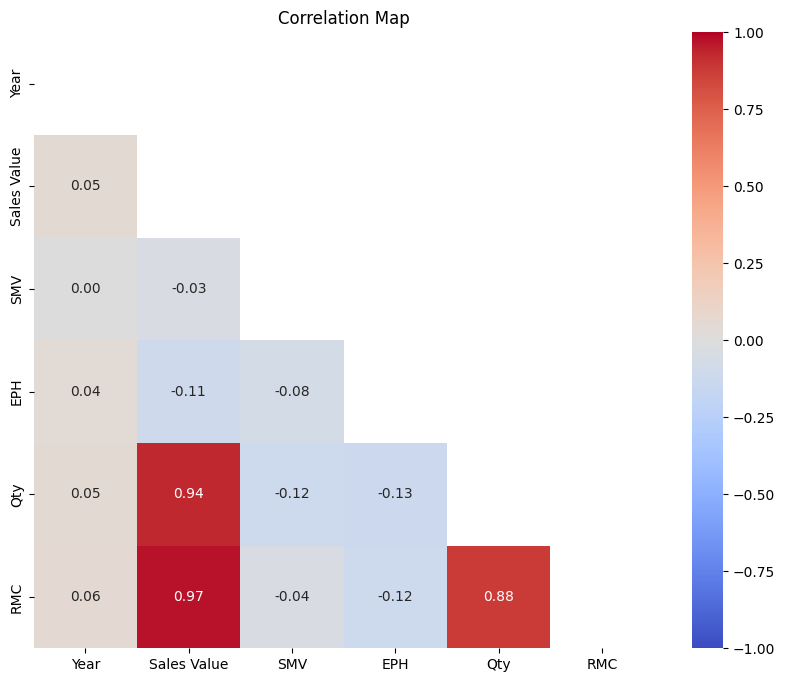

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Sample data (replace this with your actual DataFrame)

df = pd.DataFrame(df)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)

# Set the title
plt.title("Correlation Map")

# Show the plot
plt.show()


polynomial regression **model**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.metrics import mean_squared_error

# Assume df is your original DataFrame with the relevant columns
# Assume trained_models is a dictionary storing the trained models for each Customer-Product Hierarchy combination

# Your training code here...

# Example of how you might store trained models in a dictionary
trained_models = {}

mse_dict = {}

unique_combinations = df[['Customer', 'Product Hierarchy']].drop_duplicates()

for index, row in unique_combinations.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']

    # Filter data for the specific Customer and Product Hierarchy
    subset_data = df[(df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)]

    # Check if there are enough samples for training
    if len(subset_data) < 2:
        print(f"Not enough samples for {customer}-{product_hierarchy}. Skipping.")
        continue

    # Split data into training and testing sets
    X_train, y_train = subset_data[['Qty']], subset_data['Sales Value']

    # Introduce polynomial features
    degree = 2  # Adjust the degree of the polynomial as needed
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Train a polynomial regression model
    polyreg.fit(X_train, y_train)

    # Store the trained model in the dictionary
    trained_models[(customer, product_hierarchy)] = polyreg

    # Make predictions on the training set
    y_pred = polyreg.predict(X_train)

    # Create a mask for indexing
    mask = (df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)

    # Store the predicted values in the DataFrame
    df.loc[mask, 'Predicted_Sales_Value'] = y_pred

    # Calculate MSE
    mse = mean_squared_error(y_train, y_pred)

    # Store the MSE in the dictionary
    mse_dict[(customer, product_hierarchy)] = mse

# Input data for prediction
new_data = pd.DataFrame({
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'Qty': [229230, 363232, 6921],
    'Actual Sales Value': [938056.190, 1796470.099, 39315.63],
})

# Make predictions for each row in the new data
predictions_SV = []

for index, row in new_data.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']
    qty = row['Qty']

    # Check if a model is available for the given Customer-Product Hierarchy combination
    if (customer, product_hierarchy) in trained_models:
        polyreg = trained_models[(customer, product_hierarchy)]

        # Make a prediction using the trained model
        sales_value_prediction = polyreg.predict([[qty]])[0]
        predictions_SV.append(sales_value_prediction)
    else:
        print(f"No trained model found for {customer}-{product_hierarchy}. Skipping.")

# Add predicted Sales Value to the new data
new_data['Sales Value Prediction'] = predictions_SV

# Display the actual and predicted Sales Values
print(new_data[['Customer', 'Product Hierarchy', 'Qty', 'Actual Sales Value', 'Sales Value Prediction']])


Not enough samples for Aqua Green REMOVE-SWIMSUIT. Skipping.
Not enough samples for Aqua Green REMOVE-TANKINI. Skipping.
Not enough samples for Lands' End-TANKINI. Skipping.
Not enough samples for Speedo Intl.-SWIM T-SHIRT. Skipping.
Not enough samples for Speedo Israel-BAND. Skipping.
Not enough samples for Triumph REMOVE-BRA. Skipping.
Not enough samples for Triumph REMOVE-SWIM BOTTOM. Skipping.
Not enough samples for Triumph REMOVE-SWIMSUIT. Skipping.
Not enough samples for Walmart-SWIMSUIT. Skipping.
Not enough samples for Yamamay-SWIM TOP. Skipping.
Not enough samples for Amazon UK-BRA. Skipping.
Not enough samples for Amazon UK-SWIM BOTTOM. Skipping.
Not enough samples for Amazon UK-SWIM TOP. Skipping.
Not enough samples for Amazon UK-SWIMSUIT. Skipping.
Not enough samples for CK (Europe) Woven-SWIM BOTTOM. Skipping.
Not enough samples for CK USA-BRA. Skipping.
Not enough samples for CK USA-SWIM BOTTOM. Skipping.
Not enough samples for CK USA-SWIMSUIT. Skipping.
Not enough sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
print(df)

     Year           Customer Product Hierarchy  Sales Value    SMV        EPH  \
1    2018              Aerie               BRA   511448.140  10.86  17.135616   
2    2018              Aerie       SWIM BOTTOM   181522.380   4.83  15.884406   
3    2018  Aqua Green REMOVE          SWIMSUIT   348144.940  16.76   7.281584   
4    2018  Aqua Green REMOVE           TANKINI   259840.900  13.25   4.441441   
5    2018            Athleta               BRA   590522.845  16.16  27.642753   
..    ...                ...               ...          ...    ...        ...   
471  2023       TOMMY EUROPE          LEGGINGS   236133.950  13.47  29.222766   
472  2023       TOMMY EUROPE    NON UNDERWIRED    20985.800  12.38  34.764306   
473  2023       TOMMY EUROPE       SWIM BOTTOM    13589.290  10.63  31.915610   
474  2023       TOMMY EUROPE      SWIM T-SHIRT     8728.980  20.46  21.594567   
475  2023       TOMMY EUROPE          SWIMSUIT     5836.350  17.79  34.958243   

         Qty            RMC

# **smv**

In [ ]:
df=df0

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assume df is your original DataFrame with the relevant columns
# Assume trained_models is a dictionary storing the trained models for each Customer-Product Hierarchy combination

# Your training code here...

# Example of how you might store trained models in a dictionary
trained_models = {}

unique_combinations = df[['Customer', 'Product Hierarchy']].drop_duplicates()

for index, row in unique_combinations.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']

    # Filter data for the specific Customer and Product Hierarchy
    subset_data = df[(df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)]

    # Check if there are enough samples for training
    if len(subset_data) < 2:
        print(f"Not enough samples for {customer}-{product_hierarchy}. Skipping.")
        continue

    # Split data into training and testing sets
    X_train, y_train = subset_data[['Year']], subset_data['SMV']

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Store the trained model in the dictionary
    trained_models[(customer, product_hierarchy)] = model

# Input data for prediction
new_data = pd.DataFrame({
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'Qty': [229230, 363232, 6921],
    'Year':[2023,2023,2023],
    'Actual SMV':[5.32, 14.39, 6.11],
})

# Make predictions for each row in the new data
predictions_SMV = []

for index, row in new_data.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']
    Year = row['Year']

    # Check if a model is available for the given Customer-Product Hierarchy combination
    if (customer, product_hierarchy) in trained_models:
        model = trained_models[(customer, product_hierarchy)]

        # Make a prediction using the trained model
        sales_value_prediction = model.predict([[Year]])[0]
        predictions_SMV.append(sales_value_prediction)
    else:
        print(f"No trained model found for {customer}-{product_hierarchy}. Skipping.")

# Add predicted SMV to the new data
new_data['SMV Prediction'] = predictions_SMV

# Display the actual and predicted Sales Values
print(new_data[['Customer', 'Product Hierarchy', 'Qty', 'Actual SMV', 'SMV Prediction']])


In [ ]:
print(predictions_SMV)

[9.392307692307895, 14.629999999999995, 14.408500000000004]


In [ ]:
df=df1

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Define features and target
X = df[[ 'Customer', 'Product Hierarchy', 'Sales Value', 'Qty', 'RMC']]
y = df['SMV']

# Convert categorical features to numerical using one-hot encoding or label encoding
X_encoded = pd.get_dummies(X)

# Create and train the Random Forest Regressor model using all data
rf_model = RandomForestRegressor(n_estimators=1000, random_state=100)
rf_model.fit(X_encoded, y)

# Make predictions on the entire dataset
y_pred_SMV = rf_model.predict(X_encoded)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y, y_pred_SMV)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1.8353964853417932


In [ ]:
import pandas as pd

# ... (previous code for model training)

# Creating a dummy test dataset
test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'SMV': [5.32, 14.39, 6.11],  # Intentionally putting a missing value
    'EPH': [16.88, 10.73, 29.96]  ,# These are the actual values for testing
   'RMC': [589220.12, 897882.248, 18160.065],
   'Sales Value':[938056.190,1796470.099,39315.63],
    'Qty':[229230,363232,6921]

}

test_df = pd.DataFrame(test_data)

# Handle missing values in SMV (replace with mean for simplicity)
test_df['SMV'].fillna(test_df['SMV'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test = test_df[[ 'Customer', 'Sales Value','Qty', 'RMC']]

# Concatenate the test set with the training set to ensure the same one-hot encoding
X_combined = pd.concat([X, X_test], axis=0)

# Apply one-hot encoding to the combined set
X_combined_encoded = pd.get_dummies(X_combined)

# Separate the combined set back into training and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X)]
X_test_encoded = X_combined_encoded.iloc[len(X):]

# Assuming 'y_test' is the target variable 'EPH'
y_test = test_df['EPH']

# Make predictions on the test set using the trained model 'rf_model'
y_test_pred_SMV = rf_model.predict(X_test_encoded)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred_SMV)
#print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred_SMV})
print(results_df)


   Actual EPH  Predicted EPH
0       16.88       11.64396
1       10.73       12.04216
2       29.96       20.24675


# **RMC**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assume df is your original DataFrame with the relevant columns
# Assume trained_models is a dictionary storing the trained models for each Customer-Product Hierarchy combination

# Your training code here...

# Example of how you might store trained models in a dictionary
trained_models = {}

unique_combinations = df[['Customer', 'Product Hierarchy']].drop_duplicates()

for index, row in unique_combinations.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']

    # Filter data for the specific Customer and Product Hierarchy
    subset_data = df[(df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)]

    # Check if there are enough samples for training
    if len(subset_data) < 2:
        print(f"Not enough samples for {customer}-{product_hierarchy}. Skipping.")
        continue

    # Split data into training and testing sets
    X_train, y_train = subset_data[['Qty']], subset_data['RMC']

    # Train a linear regression model
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Store the trained model in the dictionary
    trained_models[(customer, product_hierarchy)] = model1

    # Make predictions on the training set
    y_pred = model1.predict(X_train)

    # Create a mask for indexing
    mask = (df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)

    # Store the predicted values in the DataFrame
    df.loc[mask, 'Predicted_RMC'] = y_pred


# Input data for prediction
new_data1 = pd.DataFrame({
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'Qty': [229230, 363232, 6921],
    'Actual RMC':  [589220.12, 897882.248, 18160.065],
})

# Make predictions for each row in the new data
predictions_RMC = []

for index, row in new_data1.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']
    qty = row['Qty']

    # Check if a model is available for the given Customer-Product Hierarchy combination
    if (customer, product_hierarchy) in trained_models:
        model1 = trained_models[(customer, product_hierarchy)]

        # Make a prediction using the trained model
        sales_value_prediction = model1.predict([[qty]])[0]
        predictions_RMC.append(sales_value_prediction)
    else:
        print(f"No trained model found for {customer}-{product_hierarchy}. Skipping.")

# Add predicted RMC to the new data
new_data1['RMC Prediction'] = predictions_RMC

# Display the actual and predicted RMC
print(new_data1[['Customer', 'Product Hierarchy', 'Qty', 'Actual RMC', 'RMC Prediction']])


Not enough samples for Aqua Green REMOVE-SWIMSUIT. Skipping.
Not enough samples for Aqua Green REMOVE-TANKINI. Skipping.
Not enough samples for Lands' End-TANKINI. Skipping.
Not enough samples for Speedo Intl.-SWIM T-SHIRT. Skipping.
Not enough samples for Speedo Israel-BAND. Skipping.
Not enough samples for Triumph REMOVE-BRA. Skipping.
Not enough samples for Triumph REMOVE-SWIM BOTTOM. Skipping.
Not enough samples for Triumph REMOVE-SWIMSUIT. Skipping.
Not enough samples for Walmart-SWIMSUIT. Skipping.
Not enough samples for Yamamay-SWIM TOP. Skipping.
Not enough samples for Amazon UK-BRA. Skipping.
Not enough samples for Amazon UK-SWIM BOTTOM. Skipping.
Not enough samples for Amazon UK-SWIM TOP. Skipping.
Not enough samples for Amazon UK-SWIMSUIT. Skipping.
Not enough samples for CK (Europe) Woven-SWIM BOTTOM. Skipping.
Not enough samples for CK USA-BRA. Skipping.
Not enough samples for CK USA-SWIM BOTTOM. Skipping.
Not enough samples for CK USA-SWIMSUIT. Skipping.
Not enough sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(df)

     Year           Customer Product Hierarchy  Sales Value    SMV        EPH  \
1    2018              Aerie               BRA   511448.140  10.86  17.135616   
2    2018              Aerie       SWIM BOTTOM   181522.380   4.83  15.884406   
3    2018  Aqua Green REMOVE          SWIMSUIT   348144.940  16.76   7.281584   
4    2018  Aqua Green REMOVE           TANKINI   259840.900  13.25   4.441441   
5    2018            Athleta               BRA   590522.845  16.16  27.642753   
..    ...                ...               ...          ...    ...        ...   
471  2023       TOMMY EUROPE          LEGGINGS   236133.950  13.47  29.222766   
472  2023       TOMMY EUROPE    NON UNDERWIRED    20985.800  12.38  34.764306   
473  2023       TOMMY EUROPE       SWIM BOTTOM    13589.290  10.63  31.915610   
474  2023       TOMMY EUROPE      SWIM T-SHIRT     8728.980  20.46  21.594567   
475  2023       TOMMY EUROPE          SWIMSUIT     5836.350  17.79  34.958243   

         Qty            RMC

<ipython-input-77-b5c81bc65b50>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


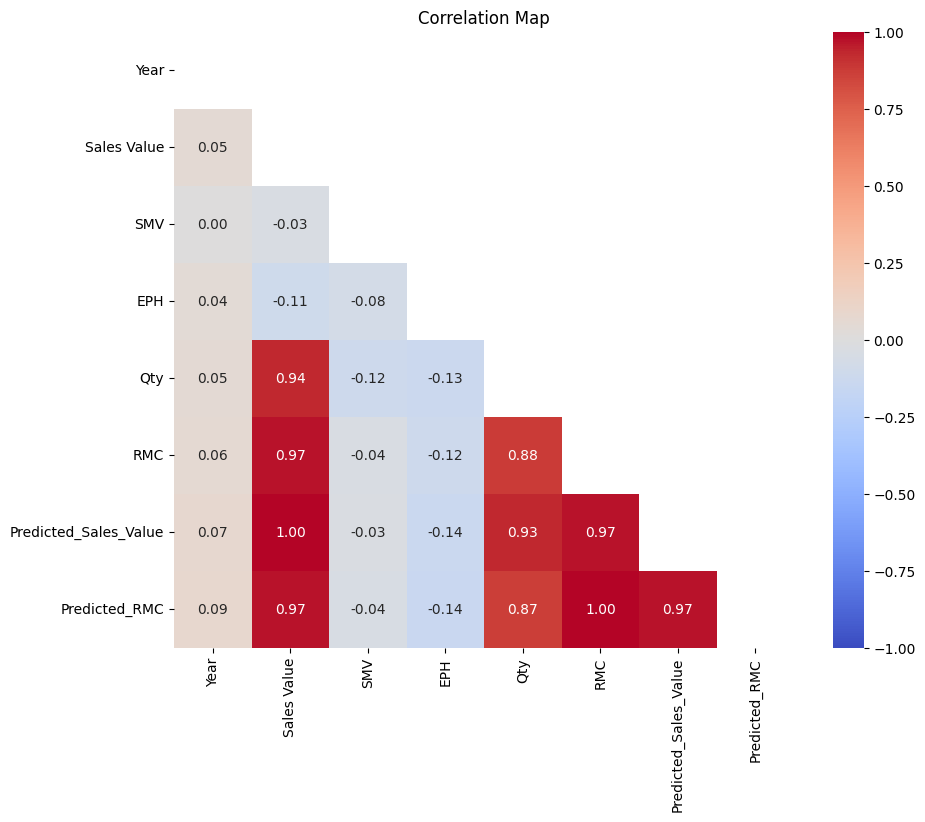

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy

# Sample data (replace this with your actual DataFrame)

df = pd.DataFrame(df)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", annot=True, fmt=".2f", vmin=-1, vmax=1)

# Set the title
plt.title("Correlation Map")

# Show the plot
plt.show()


# **SV&RMC**

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assume df is your original DataFrame with the relevant columns
# Assume trained_models is a dictionary storing the trained models for each Customer-Product Hierarchy combination

# Your training code here...

# Example of how you might store trained models in a dictionary
trained_models = {}

unique_combinations = df[['Customer', 'Product Hierarchy']].drop_duplicates()

for index, row in unique_combinations.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']

    # Filter data for the specific Customer and Product Hierarchy
    subset_data = df[(df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)]

    # Check if there are enough samples for training
    if len(subset_data) < 2:
        print(f"Not enough samples for {customer}-{product_hierarchy}. Skipping.")
        continue

    # Split data into training and testing sets
    X_train, y_train = subset_data[['Sales Value']], subset_data['RMC']

    # Train a linear regression model
    model3 = LinearRegression()
    model3.fit(X_train, y_train)

    # Store the trained model in the dictionary
    trained_models[(customer, product_hierarchy)] = model3

    # Make predictions on the training set
    y_pred = model3.predict(X_train)

    # Create a mask for indexing
    mask = (df['Customer'] == customer) & (df['Product Hierarchy'] == product_hierarchy)

    # Store the predicted values in the DataFrame
    df.loc[mask, 'Predicted_RMC_2'] = y_pred


# Input data for prediction
new_data1 = pd.DataFrame({
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'Qty': [229230, 363232, 6921],
    'Sales Value': [938056.190, 1796470.099, 39315.63],
    'Actual RMC':  [589220.12, 897882.248, 18160.065],
})

# Make predictions for each row in the new data
predictions_RMC_2 = []

for index, row in new_data1.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']
    qty = row['Sales Value']

    # Check if a model is available for the given Customer-Product Hierarchy combination
    if (customer, product_hierarchy) in trained_models:
        model3 = trained_models[(customer, product_hierarchy)]

        # Make a prediction using the trained model
        sales_value_prediction = model3.predict([[qty]])[0]
        predictions_RMC_2.append(sales_value_prediction)
    else:
        print(f"No trained model found for {customer}-{product_hierarchy}. Skipping.")

# Add predicted RMC to the new data
new_data1['RMC Prediction 2'] = predictions_RMC_2

# Display the actual and predicted RMC
print(new_data1[['Customer', 'Product Hierarchy', 'Qty', 'Actual RMC', 'RMC Prediction 2']])


Not enough samples for Aqua Green REMOVE-SWIMSUIT. Skipping.
Not enough samples for Aqua Green REMOVE-TANKINI. Skipping.
Not enough samples for Lands' End-TANKINI. Skipping.
Not enough samples for Speedo Intl.-SWIM T-SHIRT. Skipping.
Not enough samples for Speedo Israel-BAND. Skipping.
Not enough samples for Triumph REMOVE-BRA. Skipping.
Not enough samples for Triumph REMOVE-SWIM BOTTOM. Skipping.
Not enough samples for Triumph REMOVE-SWIMSUIT. Skipping.
Not enough samples for Walmart-SWIMSUIT. Skipping.
Not enough samples for Yamamay-SWIM TOP. Skipping.
Not enough samples for Amazon UK-BRA. Skipping.
Not enough samples for Amazon UK-SWIM BOTTOM. Skipping.
Not enough samples for Amazon UK-SWIM TOP. Skipping.
Not enough samples for Amazon UK-SWIMSUIT. Skipping.
Not enough samples for CK (Europe) Woven-SWIM BOTTOM. Skipping.
Not enough samples for CK USA-BRA. Skipping.
Not enough samples for CK USA-SWIM BOTTOM. Skipping.
Not enough samples for CK USA-SWIMSUIT. Skipping.
Not enough sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(df)

     Year           Customer Product Hierarchy  Sales Value    SMV        EPH  \
1    2018              Aerie               BRA   511448.140  10.86  17.135616   
2    2018              Aerie       SWIM BOTTOM   181522.380   4.83  15.884406   
3    2018  Aqua Green REMOVE          SWIMSUIT   348144.940  16.76   7.281584   
4    2018  Aqua Green REMOVE           TANKINI   259840.900  13.25   4.441441   
5    2018            Athleta               BRA   590522.845  16.16  27.642753   
..    ...                ...               ...          ...    ...        ...   
471  2023       TOMMY EUROPE          LEGGINGS   236133.950  13.47  29.222766   
472  2023       TOMMY EUROPE    NON UNDERWIRED    20985.800  12.38  34.764306   
473  2023       TOMMY EUROPE       SWIM BOTTOM    13589.290  10.63  31.915610   
474  2023       TOMMY EUROPE      SWIM T-SHIRT     8728.980  20.46  21.594567   
475  2023       TOMMY EUROPE          SWIMSUIT     5836.350  17.79  34.958243   

         Qty            RMC

# **EPH**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Specify the path to your folder
folder_path = '/content/drive/MyDrive'

# Change the current working directory to the specified folder
os.chdir(folder_path)

import pandas as pd

# Specify the name of your CSV file
csv_file_name = 'sumdata without 2023.csv'

# Read the CSV file
df_eph = pd.read_csv(csv_file_name)

# Display the first few rows of the DataFrame
df_eph.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Customer,Year,Product Hierarchy,Qty,RMC,Sales Value,SMV,EPH
0,NaN,2019,NaN,NaN,NaN,39268523.35,NaN,NaN
1,NaN,2021,NaN,5314.0,NaN,27113.00,NaN,18.217314
2,NaN,2021,BRA,21478.0,4037.28219,77838.96,6.72,14.117153
3,NaN,2021,SWIM BOTTOM,170874.0,404473.76040,810350.26,7.75,15.654527
4,NaN,2021,SWIM T-SHIRT,153488.0,282668.80610,694067.50,9.80,11.938512


In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assume df is your original DataFrame with the relevant columns
# Assume trained_models is a dictionary storing the trained models for each Customer-Product Hierarchy combination

# Your training code here...

# Example of how you might store trained models in a dictionary
trained_models = {}

unique_combinations = df_eph[['Customer', 'Product Hierarchy']].drop_duplicates()

for index, row in unique_combinations.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']

    # Filter data for the specific Customer and Product Hierarchy
    subset_data = df_eph[(df_eph['Customer'] == customer) & (df_eph['Product Hierarchy'] == product_hierarchy)]

    # Check if there are enough samples for training
    if len(subset_data) < 2:
        print(f"Not enough samples for {customer}-{product_hierarchy}. Skipping.")
        continue

    # Split data into training and testing sets
    X_train, y_train = subset_data[['Sales Value']], subset_data['RMC']

    # Train a linear regression model
    model1 = LinearRegression()
    model1.fit(X_train, y_train)

    # Store the trained model in the dictionary
    trained_models[(customer, product_hierarchy)] = model1

    # Make predictions on the training set
    y_pred = model1.predict(X_train)

    # Create a mask for indexing
    mask = (df_eph['Customer'] == customer) & (df_eph['Product Hierarchy'] == product_hierarchy)

    # Store the predicted values in the DataFrame
    df_eph.loc[mask, 'Predicted_RMC_2'] = y_pred


# Input data for prediction
new_data1 = pd.DataFrame({
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'Qty': [229230, 363232, 6921],
    'Sales Value': [938056.190, 1796470.099, 39315.63],
    'Actual RMC':  [589220.12, 897882.248, 18160.065],
})

# Make predictions for each row in the new data
predictions_RMC_2= []

for index, row in new_data1.iterrows():
    customer = row['Customer']
    product_hierarchy = row['Product Hierarchy']
    qty = row['Sales Value']

    # Check if a model is available for the given Customer-Product Hierarchy combination
    if (customer, product_hierarchy) in trained_models:
        model1 = trained_models[(customer, product_hierarchy)]

        # Make a prediction using the trained model
        sales_value_prediction = model1.predict([[qty]])[0]
        predictions_RMC_2.append(sales_value_prediction)
    else:
        print(f"No trained model found for {customer}-{product_hierarchy}. Skipping.")

# Add predicted RMC to the new data
new_data1['RMC Prediction 2'] = predictions_RMC_2

# Display the actual and predicted RMC
print(new_data1[['Customer', 'Product Hierarchy', 'Qty', 'Actual RMC', 'RMC Prediction 2']])


Not enough samples for nan-nan. Skipping.
Not enough samples for nan-BRA. Skipping.
Not enough samples for nan-SWIM BOTTOM. Skipping.
Not enough samples for nan-SWIM T-SHIRT. Skipping.
Not enough samples for nan-SWIMSUIT. Skipping.
Not enough samples for A&F - Swim-nan. Skipping.
Not enough samples for A&F - Swim-SWIMSUIT. Skipping.
Not enough samples for Adore Me-nan. Skipping.
Not enough samples for Adore Me-ACCESSORIES. Skipping.
Not enough samples for Adore Me-BRA. Skipping.
Not enough samples for Adore Me-SWIM BOTTOM. Skipping.
Not enough samples for Aerie-nan. Skipping.
Not enough samples for Aerie-NON UNDERWIRED. Skipping.
Not enough samples for Aerie-UNDERWIRED. Skipping.
Not enough samples for Amante-nan. Skipping.
Not enough samples for Amante-BRA. Skipping.
Not enough samples for Amante-SWIM BOTTOM. Skipping.
Not enough samples for Amante-SWIMSUIT. Skipping.
Not enough samples for Amazon UK-nan. Skipping.
Not enough samples for Amazon UK-BRA. Skipping.
Not enough samples for

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(new_data1['RMC Prediction 2'])

0    4.679390e+05
1    1.924752e+06
2    2.189417e+04
Name: RMC Prediction 2, dtype: float64


In [ ]:
df=df1

In [ ]:
df_eph.count()

Customer             187
Year                 187
Product Hierarchy    187
Qty                  187
RMC                  187
Sales Value          187
SMV                  187
EPH                  187
Predicted_RMC_2      187
dtype: int64

In [ ]:
df_eph = df_eph.dropna()

In [ ]:
# Add predicted Sales Value to the new data
df_eph['Predicted_Sales_Value'] = df_eph['Sales Value']
df_eph['Predicted_RMC'] = df_eph['RMC']
# Display the actual and predicted Sales Values
print(df_eph)


       Customer  Year Product Hierarchy       Qty            RMC  Sales Value  \
9    A&F - Swim  2022               BRA   76351.0  170156.910500    443079.83   
10   A&F - Swim  2021               BRA  227264.0  401765.255600   1231985.98   
11   A&F - Swim  2022       SWIM BOTTOM   64704.0  109913.236500    193855.92   
12   A&F - Swim  2021       SWIM BOTTOM   68532.0   45806.965900    213068.76   
21        Aerie  2019               BRA     180.0     593.326651      1005.20   
..          ...   ...               ...       ...            ...          ...   
338     Yamamay  2018               BRA   50495.0  140391.723500    237794.49   
339     Yamamay  2019       SWIM BOTTOM    5976.0    8897.703746     14342.40   
340     Yamamay  2018       SWIM BOTTOM   77613.0  144818.416800    211161.73   
342     Yamamay  2019          SWIMSUIT    3194.0   14109.952550     20761.00   
343     Yamamay  2018          SWIMSUIT   27517.0  177865.915100    197067.00   

       SMV        EPH  Pred

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df' is your DataFrame containing the data

# Define features and target
X = df_eph[[ 'Customer', 'Product Hierarchy', 'Predicted_Sales_Value','Qty', 'SMV', 'Predicted_RMC','Predicted_RMC_2']]
#y=df[['EPH']]
y = (df_eph['Sales Value'] - df_eph['RMC']) * 60 / (df_eph['SMV'] * df_eph['Qty'])

# Convert categorical features to numerical using one-hot encoding or label encoding
X_encoded = pd.get_dummies(X)

# Create and train the Random Forest Regressor model using all data
rf_model = RandomForestRegressor(n_estimators=1000, random_state=100)
rf_model.fit(X_encoded, y)

# Make predictions on the entire dataset
y_pred = rf_model.predict(X_encoded)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 5.4312281683702075


In [ ]:
import pandas as pd

# ... (previous code for model training)

# Creating a dummy test dataset
test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'SMV': [5.32, 14.39, 6.11],  # Intentionally putting a missing value
    'EPH': [17.18, 10.55, 29.29]   ,# These are the actual values for testing
   'Predicted_RMC': [589220.12, 897882.248, 18160.065],
   'Predicted_Sales_Value':[938056.190,1796470.099,39315.63],
    'Qty':[229230,363232,6921],
    'Predicted_RMC_2':new_data1['RMC Prediction 2']

}

test_df = pd.DataFrame(test_data)

# Handle missing values in SMV (replace with mean for simplicity)
test_df['SMV'].fillna(test_df['SMV'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test = test_df[[ 'Customer', 'Product Hierarchy', 'Predicted_Sales_Value','Qty', 'SMV', 'Predicted_RMC','Predicted_RMC_2']]

# Concatenate the test set with the training set to ensure the same one-hot encoding
X_combined = pd.concat([X, X_test], axis=0)

# Apply one-hot encoding to the combined set
X_combined_encoded = pd.get_dummies(X_combined)

# Separate the combined set back into training and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X)]
X_test_encoded = X_combined_encoded.iloc[len(X):]

# Assuming 'y_test' is the target variable 'EPH'
y_test = test_df['EPH']

# Make predictions on the test set using the trained model 'rf_model'
y_test_pred1 = rf_model.predict(X_test_encoded)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred1)
#print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred1})
print(results_df)


   Actual EPH  Predicted EPH
0       17.18      17.012467
1       10.55      13.425660
2       29.29      23.701659


In [ ]:
import pandas as pd

# ... (previous code for model training)

# Creating a dummy test dataset
test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'SMV':[5.32, 14.39, 6.11],  # Intentionally putting a missing value
    'EPH': [17.18, 10.55, 29.29]  ,# These are the actual values for testing
   'Predicted_RMC':predictions_RMC,
   'Predicted_Sales_Value':predictions_SV,
    'Qty':[229230,363232,6921],
    'Predicted_RMC_2':new_data1['RMC Prediction 2']

}

test_df = pd.DataFrame(test_data)

# Handle missing values in SMV (replace with mean for simplicity)
test_df['SMV'].fillna(test_df['SMV'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test = test_df[[ 'Customer', 'Product Hierarchy', 'Predicted_Sales_Value','Qty', 'SMV', 'Predicted_RMC','Predicted_RMC_2']]

# Concatenate the test set with the training set to ensure the same one-hot encoding
X_combined = pd.concat([X, X_test], axis=0)

# Apply one-hot encoding to the combined set
X_combined_encoded = pd.get_dummies(X_combined)

# Separate the combined set back into training and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X)]
X_test_encoded = X_combined_encoded.iloc[len(X):]

# Assuming 'y_test' is the target variable 'EPH'
y_test = test_df['EPH']

# Make predictions on the test set using the trained model 'rf_model'
y_test_pred1 = rf_model.predict(X_test_encoded)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred1)
#print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred1})
print(results_df)


   Actual EPH  Predicted EPH
0       17.18      17.449651
1       10.55      13.386336
2       29.29      28.214615


## **Export**

In [ ]:
df = df.dropna()

In [ ]:
print(df)

     Year      Customer Product Hierarchy  Sales Value    SMV        EPH  \
1    2018         Aerie               BRA   511448.140  10.86  17.135616   
2    2018         Aerie       SWIM BOTTOM   181522.380   4.83  15.884406   
5    2018       Athleta               BRA   590522.845  16.16  27.642753   
6    2018       Athleta       SWIM BOTTOM  1279363.234  13.08  22.488529   
7    2018       Athleta      SWIM T-SHIRT    49594.200  19.24  25.816492   
..    ...           ...               ...          ...    ...        ...   
467  2023  Tommy Bahama    NON UNDERWIRED     9408.600  12.65  28.586942   
468  2023  Tommy Bahama       SWIM BOTTOM    61294.330  11.81  20.378489   
469  2023  Tommy Bahama          SWIMSUIT   599404.040  17.68  21.554550   
470  2023  TOMMY EUROPE               BRA    87012.730  14.18  28.577507   
471  2023  TOMMY EUROPE          LEGGINGS   236133.950  13.47  29.222766   

          Qty            RMC  Predicted_Sales_Value  Predicted_RMC  \
1     94295.0  21

In [ ]:

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test =  df[[ 'Customer', 'Product Hierarchy', 'Predicted_Sales_Value','Qty', 'SMV', 'Predicted_RMC','Predicted_RMC_2']]

# Concatenate the test set with the training set to ensure the same one-hot encoding
X_combined = pd.concat([X, X_test], axis=0)

# Apply one-hot encoding to the combined set
X_combined_encoded = pd.get_dummies(X_combined)

# Separate the combined set back into training and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X)]
X_test_encoded = X_combined_encoded.iloc[len(X):]

# Assuming 'y_test' is the target variable 'EPH'
y_test = df['EPH']

# Make predictions on the test set using the trained model 'rf_model'
y_test_pred1 = rf_model.predict(X_test_encoded)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred1)
#print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred1})
print(results_df)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assuming df is your original dataframe

# Extract features for training
X = df[['Customer', 'Product Hierarchy', 'Predicted_Sales_Value', 'Qty', 'SMV', 'Predicted_RMC', 'Predicted_RMC_2']]

# Assuming 'EPH' is the target variable
y = df['EPH']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform one-hot encoding on categorical features for both training and testing sets
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Make sure the columns in the test set match those in the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Assuming you have already trained a RandomForestRegressor model named 'rf_model'
# Fit the model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_encoded)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred})
print(results_df)


Mean Squared Error on Test Set: 47.94136825428972
     Actual EPH  Predicted EPH
272   15.465548      17.814843
335   -3.079673      23.174989
129   69.226311      52.548455
256   19.970084      25.334051
8     32.993628      25.300055
151   21.340149      21.019809
299   16.651114      25.554037
261   15.449320      22.142665
12    13.668939      18.023141
237  -38.989071     -18.168096
453   21.454499      23.114073
152   17.684010      21.390284
167   31.294312      26.049415
183   31.924497      26.475091
81    19.495900      25.223731
361   19.404437      20.016041
449   25.224727      24.444310
57    25.358003      18.545375
413   24.640980      24.981298
248   28.503712      20.228022
393   13.149180      21.674024
92    25.957347      22.677204
126   19.450888      18.204185
93    21.028884      22.897537
442   20.167994      21.392291
384   31.884254      19.466649
283   17.999360      21.071843
376   20.548406      22.705566
21    12.591629      19.067928
443   16.888618     

In [ ]:
# Assuming 'results_df' is your DataFrame containing the actual and predicted values
export_data = results_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Extract 'Customer', 'Product Hierarchy', 'Actual EPH', and 'Predicted EPH' as columns
export_data = df
export_data['Actual EPH'] = results_df['Actual EPH']
export_data['Predicted EPH'] = results_df['Predicted EPH']

# Specify the file path for the CSV export
export_path = '2 exported_data_2023.csv'

# Export the data to a CSV file
export_data.to_csv(export_path, index=False)

# Print a message indicating successful export
print(f'Data exported to: {export_path}')


Data exported to: 2 exported_data_2023.csv


In [ ]:
df1 = pd.DataFrame(df1)

# Handle missing values in SMV (replace with mean for simplicity)
#df1['SMV'].fillna(df1['SMV'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test = df[['Customer', 'Product Hierarchy', 'Predicted_Sales_Value','SMV','Qty' , 'Predicted_RMC']]
print(X_test)

       Customer Product Hierarchy  Predicted_Sales_Value    SMV       Qty  \
9    A&F - Swim               BRA              443079.83  14.08   76351.0   
10   A&F - Swim               BRA             1231985.98  13.27  227264.0   
11   A&F - Swim       SWIM BOTTOM              193855.92   5.79   64704.0   
12   A&F - Swim       SWIM BOTTOM              213068.76   6.22   68532.0   
13   A&F - Swim          SWIMSUIT                    NaN  14.63   11012.0   
..          ...               ...                    ...    ...       ...   
339     Yamamay       SWIM BOTTOM               14342.40   8.37    5976.0   
340     Yamamay       SWIM BOTTOM              211161.73   5.68   77613.0   
341     Yamamay          SWIM TOP                    NaN   8.90   22050.0   
342     Yamamay          SWIMSUIT               20761.00  13.78    3194.0   
343     Yamamay          SWIMSUIT              197067.00  13.31   27517.0   

     Predicted_RMC  
9    170156.910500  
10   401765.255600  
11   109913.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

# Assuming 'df' is your original DataFrame
# ... (previous code for model training)

# Assuming 'df1' is your test DataFrame
df = pd.DataFrame(df)

# Handle missing values in SMV (replace with mean for simplicity)
df['SMV'].fillna(df['SMV'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test = df[['Customer', 'Product Hierarchy', 'Predicted_Sales_Value','SMV','Qty' , 'Predicted_RMC']]
X_test_encoded = pd.get_dummies(X_test)

# Ensure that the test set columns match the training set columns
missing_cols = set(X_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0

# Make sure the order of columns is the same
X_test_encoded = X_test_encoded[X_encoded.columns]

# Make predictions on the test set using the trained model 'rf_model'
y_test_pred1 = rf_model.predict(X_test_encoded)

# Assuming 'y_test' is the target variable 'EPH'
y_test = df['EPH']

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred1)
print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred1})
print(results_df)


Mean Squared Error on Test Set: 850.8775989774309
     Actual EPH  Predicted EPH
9     14.550390      -6.179860
10    15.270148      -6.317568
11    11.889899      -8.575700
12    12.946208      -8.423240
13    18.390141      -5.796092
..          ...            ...
339    6.531138      -8.411776
340   10.046859      -8.959770
341    9.417234      -6.020542
342    9.066865      -6.273043
343    7.659955      -6.452451

[280 rows x 2 columns]


In [ ]:
import pandas as pd

# ... (previous code for model training)

# Creating a dummy test dataset
test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'SMV':y_test_pred_SMV,  # Intentionally putting a missing value
    'EPH': [16.88, 10.73, 29.96]  ,# These are the actual values for testing
   'RMC':predictions_RMC,
   'Sales Value':predictions_SV,
    'Qty':[229230,363232,6921]

}

test_df = pd.DataFrame(test_data)

# Handle missing values in SMV (replace with mean for simplicity)
test_df['SMV'].fillna(test_df['SMV'].mean(), inplace=True)

# Convert categorical features to numerical using one-hot encoding or label encoding
X_test = test_df[[ 'Customer', 'Product Hierarchy', 'Sales Value','SMV', 'RMC']]

# Concatenate the test set with the training set to ensure the same one-hot encoding
X_combined = pd.concat([X, X_test], axis=0)

# Apply one-hot encoding to the combined set
X_combined_encoded = pd.get_dummies(X_combined)

# Separate the combined set back into training and test sets
X_train_encoded = X_combined_encoded.iloc[:len(X)]
X_test_encoded = X_combined_encoded.iloc[len(X):]

# Assuming 'y_test' is the target variable 'EPH'
y_test = test_df['EPH']

# Make predictions on the test set using the trained model 'rf_model'
y_test_pred1 = rf_model.predict(X_test_encoded)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred1)
#print(f'Mean Squared Error on Test Set: {mse_test}')

# Display the actual vs predicted values
results_df = pd.DataFrame({'Actual EPH': y_test, 'Predicted EPH': y_test_pred1})
print(results_df)


   Actual EPH  Predicted EPH
0       16.88      18.000876
1       10.73      14.965216
2       29.96      22.838561


In [ ]:
print(predictions_SV)

[1039738.4718714971, 1826773.4763667774, 52126.27510463822]


In [ ]:
print(predictions_RMC)

[547434.1816383639, 933809.4693441587, 25570.951321737124]


In [ ]:
print(predictions_SMV)

[52360214331.79074, -297395529603.6832, -310896221.4981543]


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have predictions for RMC and Sales Value
# Replace the following with your actual predictions
#predictions_RMC = [value1, value2, value3]
#predictions_SV = [value4, value5, value6]

test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'SMV': y_test_pred1,  # Intentionally putting a missing value
    'RMC': predictions_RMC,
    'Sales Value': predictions_SV,
    'Qty': [229230, 363232, 6921]
}

# Create a DataFrame for the test data
test_df = pd.DataFrame(test_data)

# Calculate EPH using the provided formula
test_df['EPH'] = (test_df['Sales Value'] - test_df['RMC']) * 60 / (test_df['SMV'] * test_df['Qty'])

# Display the calculated EPH and the actual EPH for comparison
print("Calculated EPH:")
print(test_df['EPH'])

# Actual values for testing
actual_EPH = [16.88, 10.73, 29.96]
print("\nActual EPH:")
print(actual_EPH)

# Evaluate the model (using Mean Squared Error as an example)
mse = mean_squared_error(actual_EPH, test_df['EPH'])
print(f'\nMean Squared Error: {mse}')


Calculated EPH:
0     6.411839
1    10.644994
2    14.477794
Name: EPH, dtype: float64

Actual EPH:
[16.88, 10.73, 29.96]

Mean Squared Error: 116.42944362927032


In [ ]:
print(y_test_pred1)

[17.93946039 14.36045525 23.25982582]


In [ ]:
test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ['Aerie', 'Speedo Intl. - Woven', 'Athleta'],
    'Product Hierarchy': ['SWIM BOTTOM', 'SWIM BOTTOM', 'SWIM BOTTOM'],
    'SMV': [5.32, 14.39, 6.11],  # Intentionally putting a missing value
    'EPH': [16.88, 10.73, 29.96]  ,# These are the actual values for testing
   'RMC':predictions_RMC,
   'Sales Value':predictions_SV,
    'Qty':[229230,363232,6921]

}


In [ ]:
test_data = {
    'Year': [2023, 2023, 2023],
    'Customer': ["Aerie", "Speedo Intl. - Woven", "Athleta"],
    'Product Hierarchy': ['Swim Bottom', 'Swim Bottom', 'Swimsuit'],
    'SMV': [5.32, 14.39, 15.54],  # Intentionally putting a missing value
    'EPH': [15.72, 11.35, 28.35]  ,# These are the actual values for testing
   'RMC': [230231, 897882.24, 178198.28],
   'Sales Value':[375475,1796470.099,343236.45],
    'Qty':[100155,363232,23268]

}
'RMC': [2.2987, 2.4719, 3.066],